# Intorduction to Neural Network Classifacation using TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem

A classification problem is where you try to classify sometime as one thing or other.
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples=n_samples,
    noise=.03,
    random_state=42
)

In [2]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hards to understand right now...so let's visualize

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

/tmp/ipykernel_6189/44116068.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

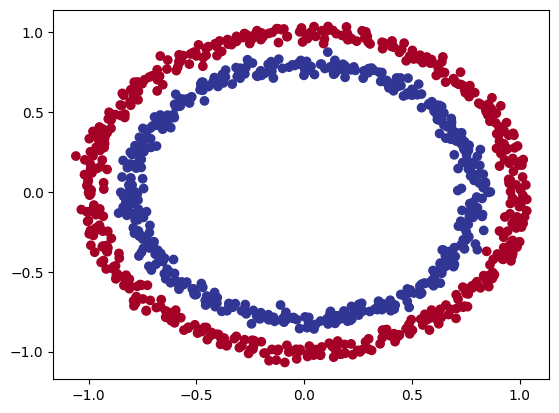

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [7]:
## Check the shapes of your features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels.
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are Typically:

1. Create or import a model
2. Compile the model
3. Fit the model

In [10]:
import tensorflow as tf

tf.__version__

2024-02-15 05:44:27.111679: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 05:44:29.606117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 05:44:29.606281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 05:44:29.977171: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 05:44:30.752370: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 05:44:30.753248: I tensorflow/core/platform/cpu_feature_guard.cc:1

'2.15.0'

In [11]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


32/32 [==============================] - 1s 1ms/step - loss: 4.3148 - accuracy: 0.4610
Epoch 2/5
32/32 [==============================] - 0s 976us/step - loss: 4.2577 - accuracy: 0.4620
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1579 - accuracy: 0.4620
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.0617 - accuracy: 0.4650
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 3.9686 - accuracy: 0.4660


In [12]:
# Let's try and train the model for longer time...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 938us/step - loss: 0.6932 - accuracy: 0.4500


[0.6931527853012085, 0.44999998807907104]

Since out model is working on Binary Classification problem and our model is getting ~50% accuracy... it's performing as if it is guessing.

So let's add an extra layer to improve out model

In [13]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

In [14]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 923us/step - loss: 0.6936 - accuracy: 0.4750


[0.6935790777206421, 0.4749999940395355]

In [15]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improve our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer
2. Compile a model - we might want to choose a different Optimisation function such as Adam instead of SGD()
3. Fit a model - we might fit our model for more epochs, leave it training for longer

In [16]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=200, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 916us/step - loss: 0.6937 - accuracy: 0.4870


[0.6936731934547424, 0.4869999885559082]

To visualize the models prediction let's create a function 'plot_decision_boundary()', this function will:

* Take trained model with features(X) and labels(y)
* Create a meshgrid of the different X values and make predictions across the meshgrid
* Plot the predictions as well as a line between zons (where each unique class falls)  

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predecting on X.
    """

    # Define the axis boundary on plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X values (We are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]    # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass classification 
    if len(y_pred[0]) > 1:
        print("doing milticlass classification")

        # We need to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")

        # Reshape the predictions to get them ready for plotting
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

156/313 [=============>................] - ETA: 0s

313/313 [==============================] - 0s 1ms/step
doing binary classification


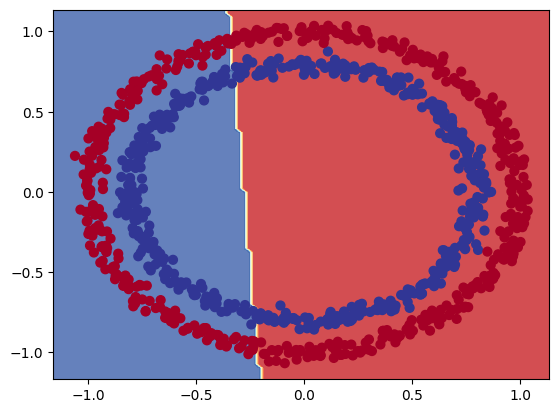

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
# Let's see if our model can be used for Regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)   # y = X + 100

# Let's slipt out data into training and test sets
X_reg_train, X_reg_test = X_regression[:150], X_regression[150:]
y_reg_train, y_reg_test = y_regression[:150], y_regression[150:]

# Fit our model to regression data
model_3.fit(
    X_reg_train,
    y_reg_train,
    epochs=100
)

Epoch 1/100


ValueError: in user code:

    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/workspaces/ml_practise/.venv/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Ooh no... we compiled our model for binary classification problem.

But... we are not working with regression problem, so lets change model to suite our data.

In [25]:
# Set the random seed for reproducibility.
tf.random.set_seed(42)

# 1. Creat the model
model_3_1 = tf.keras.Sequential()
model_3_1.add(tf.keras.layers.Dense(100))
model_3_1.add(tf.keras.layers.Dense(10))
model_3_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
model_3_1.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


5/5 [==============================] - 0s 2ms/step - loss: 368.1453 - mae: 368.1453
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 278.2247 - mae: 278.2247
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 190.9141 - mae: 190.9141
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 99.0428 - mae: 99.0428
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 48.0964 - mae: 48.0964
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 72.7859 - mae: 72.7859
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 61.9513 - mae: 61.9513
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 43.2744 - mae: 43.2744
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 47.6521 - mae: 47.6521
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.5185 - mae: 42.5185
Epoch 11/100
5/5 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 2ms/step


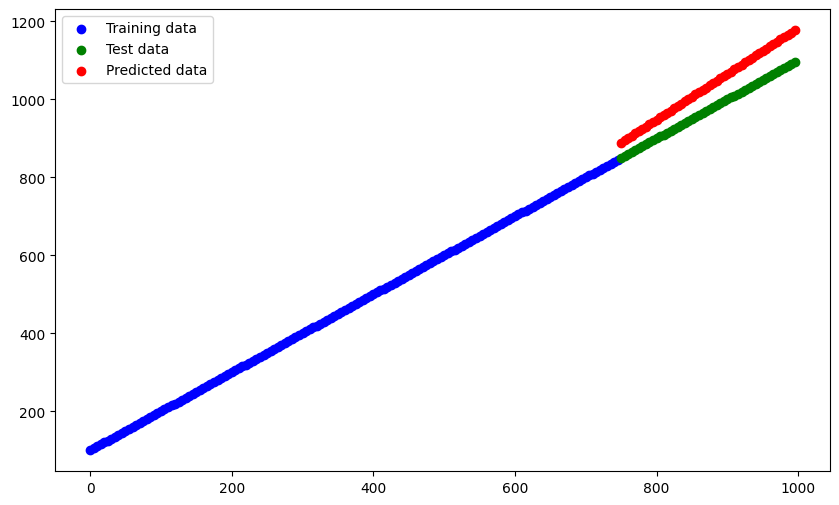

In [26]:
# Make prediction with model_3_1
y_reg_pred = model_3_1.predict(X_reg_test)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_reg_train, y_reg_train, color='blue', label='Training data')
plt.scatter(X_reg_test, y_reg_test, color='green', label='Test data')
plt.scatter(X_reg_test, y_reg_pred, color='red', label='Predicted data')

plt.legend()